In [161]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import toml

# CV2 Example
Taken from [this tutorial](https://learnopencv.com/understanding-lens-distortion/)

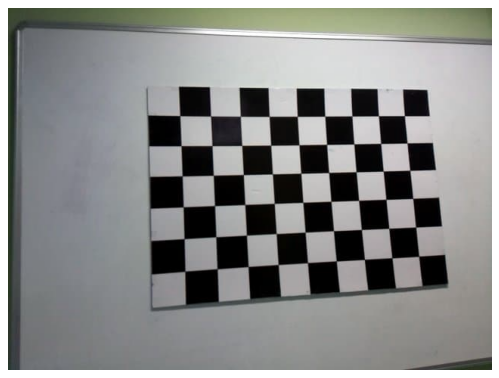

In [162]:
checker_board_image = cv2.imread("checkerboard.jpg")
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(checker_board_image)

In [163]:
patternSize = (9, 6)
retval, corners = cv2.findChessboardCorners(checker_board_image, patternSize)
print(type(corners[0][0][0]))
print(corners)

<class 'numpy.float32'>
[[[543.4887  329.0943 ]]

 [[507.54837 331.7395 ]]

 [[471.4346  333.85507]]

 [[434.50592 336.20285]]

 [[396.6122  337.71027]]

 [[357.24588 340.62732]]

 [[318.7152  342.3668 ]]

 [[277.5199  347.22797]]

 [[235.03368 348.6984 ]]

 [[539.50287 291.27798]]

 [[503.61072 292.79272]]

 [[467.64194 294.2903 ]]

 [[430.49478 296.00516]]

 [[392.7562  297.5426 ]]

 [[354.77185 299.9542 ]]

 [[315.20245 301.63843]]

 [[275.0513  304.06824]]

 [[233.43553 306.7868 ]]

 [[535.4161  252.99242]]

 [[500.15598 254.62874]]

 [[463.9941  255.79524]]

 [[427.04916 256.96063]]

 [[390.10632 258.31097]]

 [[352.07742 259.99353]]

 [[313.6273  260.88272]]

 [[272.5815  261.90933]]

 [[231.99458 264.38712]]

 [[531.49756 216.0742 ]]

 [[496.13287 217.30183]]

 [[460.1872  217.77948]]

 [[423.973   219.07097]]

 [[387.07135 219.75134]]

 [[349.69742 221.00099]]

 [[311.12958 221.80586]]

 [[271.6618  222.68274]]

 [[230.53444 223.57384]]

 [[527.6578  179.9309 ]]

 [[492.9623  1

In [164]:
objp = np.zeros((1, patternSize[0] * patternSize[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:patternSize[0], 0:patternSize[1]].T.reshape(-1, 2) 
print(objp)

[[[0. 0. 0.]
  [1. 0. 0.]
  [2. 0. 0.]
  [3. 0. 0.]
  [4. 0. 0.]
  [5. 0. 0.]
  [6. 0. 0.]
  [7. 0. 0.]
  [8. 0. 0.]
  [0. 1. 0.]
  [1. 1. 0.]
  [2. 1. 0.]
  [3. 1. 0.]
  [4. 1. 0.]
  [5. 1. 0.]
  [6. 1. 0.]
  [7. 1. 0.]
  [8. 1. 0.]
  [0. 2. 0.]
  [1. 2. 0.]
  [2. 2. 0.]
  [3. 2. 0.]
  [4. 2. 0.]
  [5. 2. 0.]
  [6. 2. 0.]
  [7. 2. 0.]
  [8. 2. 0.]
  [0. 3. 0.]
  [1. 3. 0.]
  [2. 3. 0.]
  [3. 3. 0.]
  [4. 3. 0.]
  [5. 3. 0.]
  [6. 3. 0.]
  [7. 3. 0.]
  [8. 3. 0.]
  [0. 4. 0.]
  [1. 4. 0.]
  [2. 4. 0.]
  [3. 4. 0.]
  [4. 4. 0.]
  [5. 4. 0.]
  [6. 4. 0.]
  [7. 4. 0.]
  [8. 4. 0.]
  [0. 5. 0.]
  [1. 5. 0.]
  [2. 5. 0.]
  [3. 5. 0.]
  [4. 5. 0.]
  [5. 5. 0.]
  [6. 5. 0.]
  [7. 5. 0.]
  [8. 5. 0.]]]


In [165]:
h,w = checker_board_image.shape[:2]
gray = cv2.cvtColor(checker_board_image,cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera([objp], [corners], gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

Camera matrix : 

[[647.15779136   0.         356.98475118]
 [  0.         644.5164534  224.81299291]
 [  0.           0.           1.        ]]
dist : 

[[ 5.44855856e-01 -5.51263195e+00 -5.42386595e-04  2.31457680e-02
   1.89310790e+01]]
rvecs : 

[array([[-0.39834702],
       [ 0.22336849],
       [ 3.06361002]])]
tvecs : 

[array([[ 4.8317169 ],
       [ 2.73906323],
       [17.43096351]])]


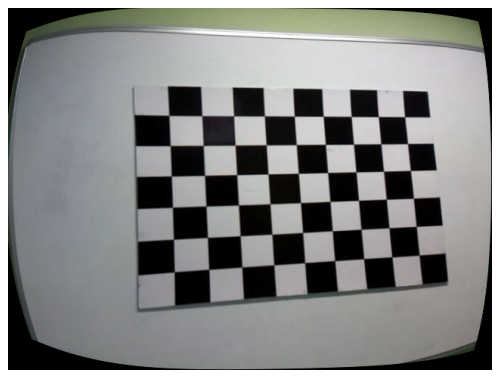

In [166]:
# Refining the camera matrix using parameters obtained by calibration
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
 
# Method 1 to undistort the image
dst = cv2.undistort(checker_board_image, mtx, dist, None, newcameramtx)
 
# Method 2 to undistort the image
mapx,mapy=cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
 
dst = cv2.remap(checker_board_image, mapx,mapy,cv2.INTER_LINEAR)
 
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(dst)

# Implementation

In [167]:
bT1 = "C:/Users/chuck/OneDrive/Desktop/Honors/BT1/BT1"
m0060 = "C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060"
images = []

csv_path = "C:/Users/chuck/OneDrive/Desktop/Honors/solarEL/solarel/Barrel_distort/chessboard.csv.csv"
df = pd.read_csv(csv_path)
# Splitting the DataFrame based on 'image' value
grouped_df = df.groupby('image')

# Creating a dictionary of DataFrames
dataframes_dict = {group_name: group_df for group_name, group_df in grouped_df}


# Accessing individual DataFrames

points = {}
for image_name, image_df in dataframes_dict.items():
    points.update({image_name: list(zip(image_df["x"], image_df['y']))})

In [168]:
import random
dict_items = list(points.items())
random_pair = random.choice(dict_items)
image_name, _ = random_pair
print(image_name)

1090605175SB1050496_IMG_8938.JPG


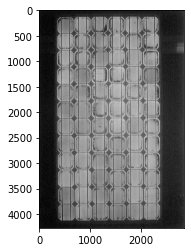

In [169]:
import cv2
# image = cv2.imread(f"{m0060}/{image_name}")
image = cv2.imread(f"{bT1}/{image_name}")
plt.imshow(image)

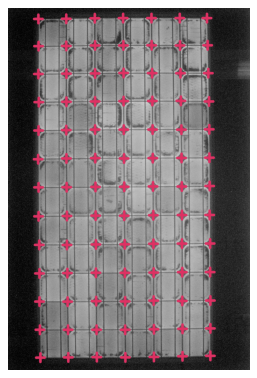

In [170]:
coords = points[str(image_name)]
for point in coords:
    image = cv2.drawMarker(image, point, (222, 49, 99), cv2.MARKER_CROSS, 100, 30)

# cv2.imwrite("markers1.jpg", image)
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(image)

In [171]:
# image_path = "C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060/LRE504055180800401088_IMG_8667.JPG"
# image = cv2.imread(image_path)
# image_cp = np.copy(image)

# for point in points:
#     image_cp = cv2.drawMarker(image_cp, point, (0,255,0), cv2.MARKER_DIAMOND, 50, 20)

# plt.figure(figsize=(8, 6), dpi=80)
# plt.axis('off')
# plt.imshow(image_cp)

In [172]:
# csv_path = "C:/Users/chuck/OneDrive/Desktop/Honors/chessboard_points.csv"
# df = pd.read_csv(csv_path)

# points = list(zip(df["x"], df['y']))
# print(points)

# image_path = "C:/Users/chuck/OneDrive/Desktop/Honors/M0060/M0060/LRE504055180800401088_IMG_8667.JPG"
# image = cv2.imread(image_path)
# image_cp = np.copy(image)

# for point in points:
#     image_cp = cv2.drawMarker(image_cp, point, (0,255,0), cv2.MARKER_DIAMOND, 50, 20)

# plt.figure(figsize=(8, 6), dpi=80)
# plt.axis('off')
# plt.imshow(image_cp)

In [173]:
corners = []
for p_list in points.values():
    corners.append(np.array([[[y, x]] for (x, y) in p_list], np.float32))
# corners = np.array([[[y, x]] for (x, y) in points[str(image_name)]], np.float32)
print()


In [174]:
patternSize = (13, 7)
objp = np.zeros((len(corners), patternSize[0] * patternSize[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:patternSize[0], 0:patternSize[1]].T.reshape(-1, 2) 
print(objp)

[[[ 0.  0.  0.]
  [ 1.  0.  0.]
  [ 2.  0.  0.]
  ...
  [10.  6.  0.]
  [11.  6.  0.]
  [12.  6.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 ...

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]

 [[ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  ...
  [ 0.  0.  0.]
  [ 0.  0.  0.]
  [ 0.  0.  0.]]]


In [175]:
h,w = image.shape[:2]
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objp, corners, gray.shape[::-1], None, None)

print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\calib3d\src\calibration.cpp:1213: error: (-215:Assertion failed) fabs(sc) > DBL_EPSILON in function 'cvFindExtrinsicCameraParams2'


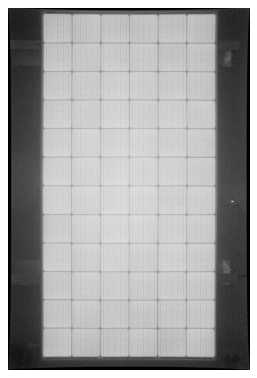

In [ ]:
# Refining the camera matrix using parameters obtained by calibration
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
 
# Method 1 to undistort the image
dst = cv2.undistort(image, mtx, dist, None, newcameramtx)
 
# Method 2 to undistort the image
mapx,mapy=cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
 
dst = cv2.remap(image, mapx,mapy,cv2.INTER_LINEAR)
 
plt.figure(figsize=(8, 6), dpi=80)
plt.axis('off')
plt.imshow(dst)

# Write the camera settings into config file

In [ ]:
with open('configs/camera_config.toml', 'rb') as f:
    data = toml.load(f)

print(data)
# Modify the value of the 'title' key
data['camera']['camera_matrix'] = newcameramtx
data['camera']['mtx'] = mtx
data['camera']['dist'] = dist
data['camera']['rvecs'] = rvecs
data['camera']['tvecs'] = tvecs
print(data)

# Write the modified dictionary back to the TOML file
with open('configs/camera_config.toml', 'w') as f:
    f.write(toml.dumps(data))

# Note you have to go into the toml file and remove the quotes.

TypeError: Expecting something like a string